In [1]:
import os
from data.dataset import TestDataset
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from utils.vis_tool import vis_bbox
from utils import array_tool as at
from data.util import read_image
from torch.utils import data as data_
import torch
from train import eval_net

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Load pretrained network
pretrained_net = 'checkpoints/flipped2.zip'

faster_rcnn = FasterRCNNVGG16(n_fg_class=2, anchor_scales=[4, 8, 16, 32], ratios=[0.8, 1, 1.25])
trainer = FasterRCNNTrainer(faster_rcnn).cuda()
trainer.load(pretrained_net)
print('load network')
trainer.eval()

Setting up a new session...


load network


FasterRCNNTrainer(
  (faster_rcnn): FasterRCNNVGG16(
    (extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): Re

## Load Test data from datasetListTest.txt

In [3]:
dataset = TestDataset(opt)
dataloader_test = data_.DataLoader(dataset, \
                              batch_size=1, \
                              shuffle=False, \
                              # pin_memory=True,
                              num_workers=opt.num_workers)
print('Test dataset loaded')

Test dataset loaded


## Evaluate network on test data

In [4]:
nms = 0.12192
score = 0.20665
eval = eval_net(dataloader_test, faster_rcnn, use_preset=False, nms=nms, score=score)
print('Score {}, Nms {}, evaluation values {} '.format(score, nms, eval))

33it [00:08,  3.85it/s]


Score 0.20665, Nms 0.12192, evaluation values {'ap': array([0.79661878, 0.80316581]), 'map': 0.7998922955298273, 'precision': {'0': 0.8013245033112583, '1': 0.9085303186022611}, 'recall': {'0': 0.8402777777777778, '1': 0.8536938676967648}} 


## Visualization - predicted one concrete image

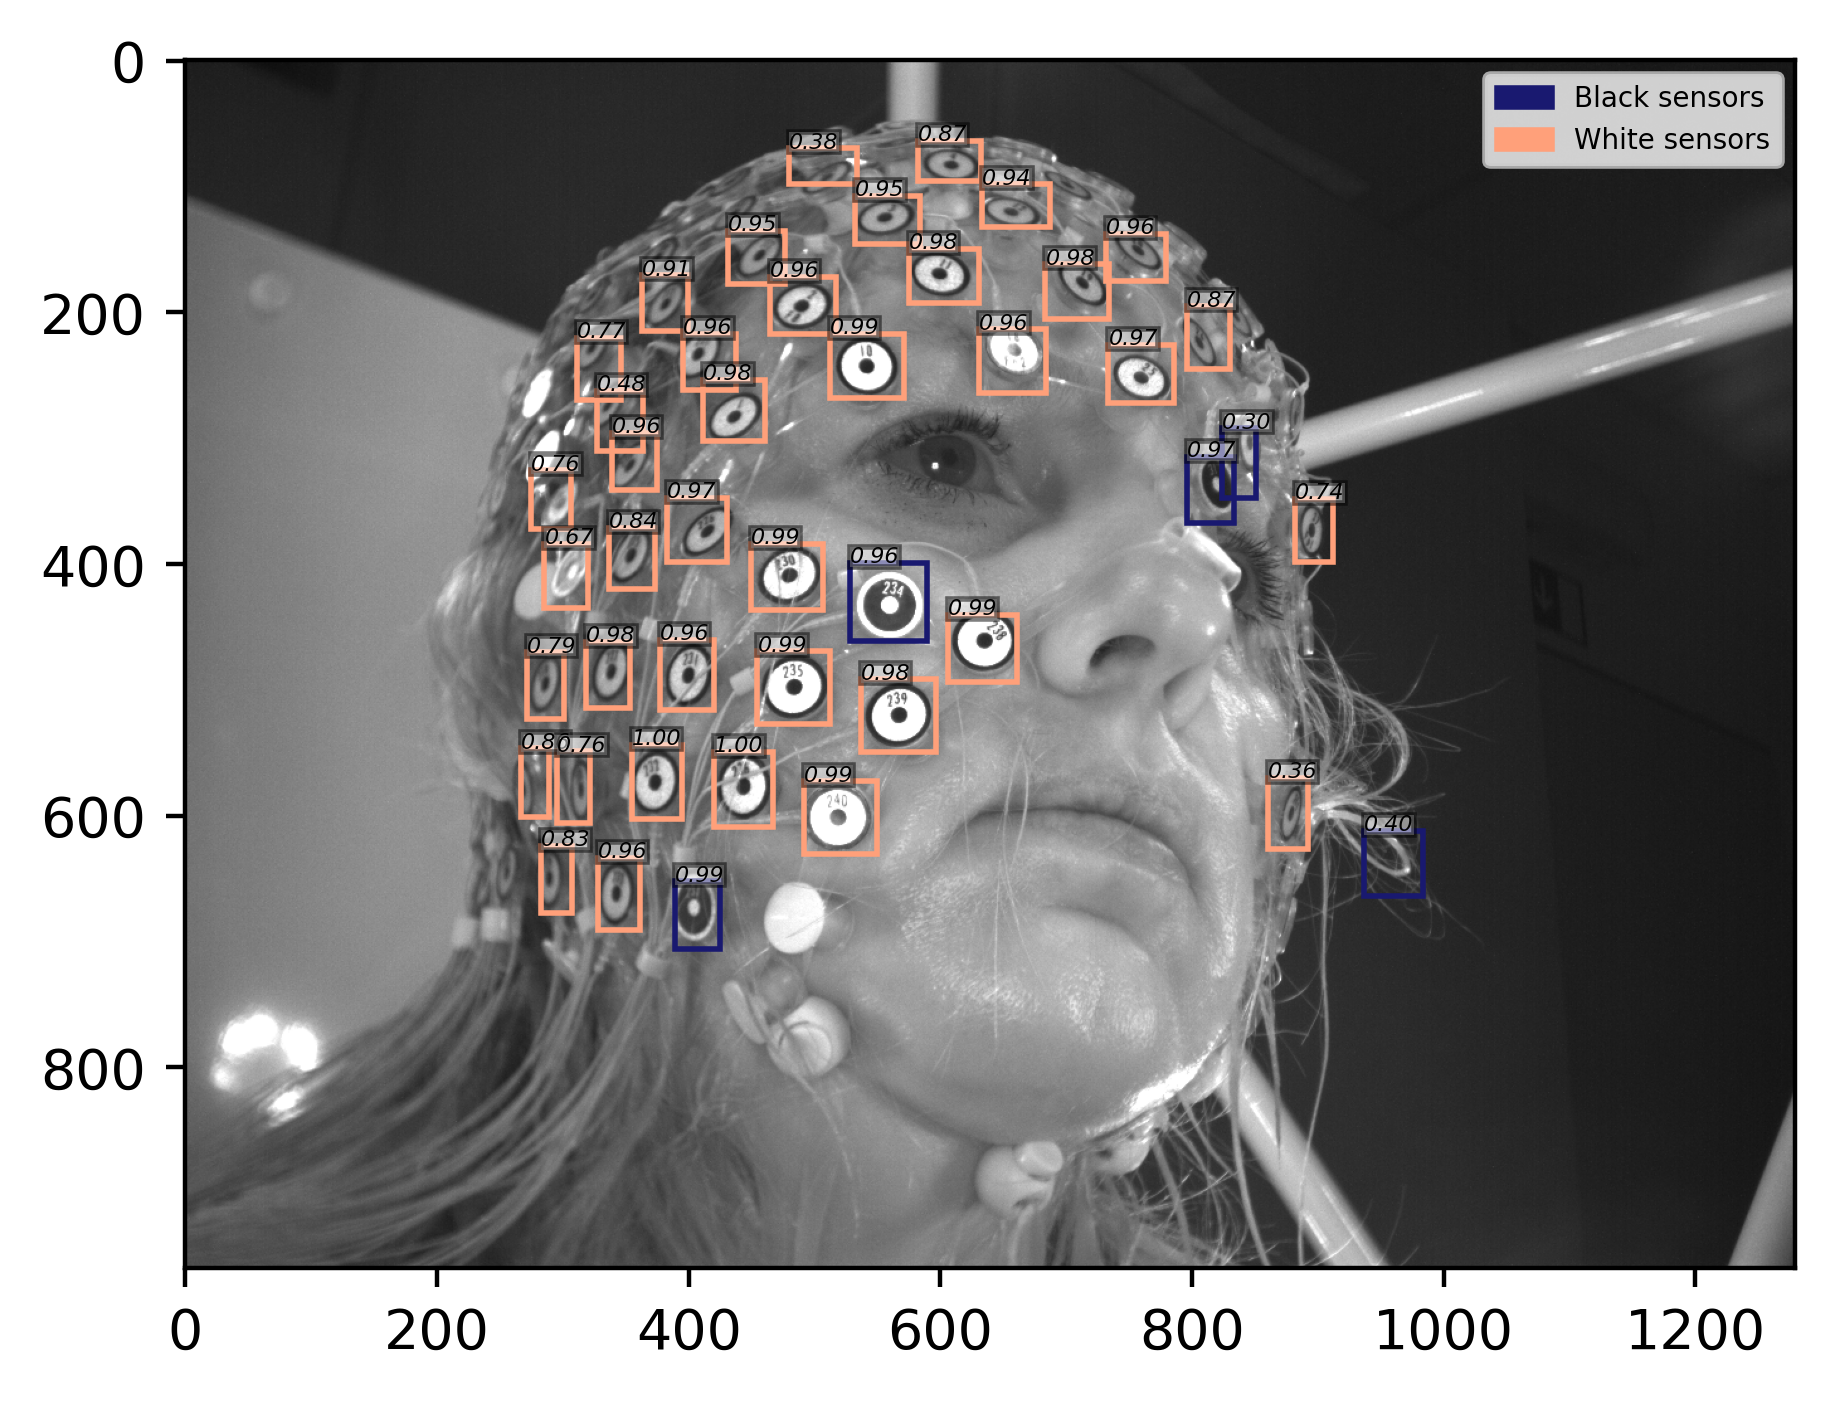

In [5]:
subject = 'AH'
camera_num = 7
img = read_image(os.path.join(opt.data_dir, 'images_dir', subject, 'camera' + str(camera_num) + '.png'))
img = torch.from_numpy(img)[None]

_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img, visualize=True,
                                                        use_preset=False,
                                                        nms=nms,
                                                        score=score)
ax = vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

# plt.savefig('test.png')